<a href="https://colab.research.google.com/github/evansemet/Cracking-The-Cryptic-Solutions/blob/main/The_Sudoku_With_No_Digits_At_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install z3-solver
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from z3 import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
def printBoard(board):
  x = np.ones((3,3))
  groups = np.block([[x*0,x*1,x*2], [x*3,x*4,x*5], [x*6,x*7,x*8]])
  fig, ax = plt.subplots(1, 1, figsize=(3, 3))
  x = np.array(board.astype('int').astype('str'))
  x[x == "0"] = "-"
  ax = sns.heatmap(groups, annot=x, cbar=False, cmap="tab20", fmt="", vmin=0, vmax=19, linewidths=1, annot_kws={"size":10})
  ax.axis("off")    
  plt.tight_layout()
  plt.show()

Solving...
Solved in 4.610995769500732 seconds.


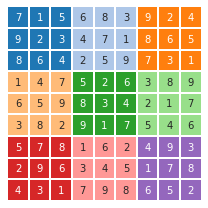

In [10]:
print("Solving...")
start = time.time()
board = np.zeros((9, 9))
X = np.array(IntVector('x', 9**2), dtype=object).reshape(9, 9)
s = Tactic("qffd").solver()

# normal sudoku
s += [And(i > 0, i < 10) for i in X.ravel()]
s += [Distinct(list(X[i, :])) for i in range(9)]
s += [Distinct(list(X[:, i])) for i in range(9)]
x = np.ones((3,3))
groups = np.block([[x*0,x*1,x*2], [x*3,x*4,x*5], [x*6,x*7,x*8]])
s += [Distinct(list(X[groups == i].ravel())) for i in range(9)]

# add in rules
# top left
tl_1 = X[0,0] + X[0,1]; tl_2 = X[0,2] + X[1,2]; tl_3 = X[1,1] + X[2,1]; tl_4 = X[2,0]
s += And(tl_1 == tl_2, tl_1 == tl_3, tl_1 == tl_4)

# top mid
tm_1 = X[0,3] + X[1,3] + X[2,3]; tm_2 = X[0,4] + X[0,5] + X[1,5]; tm_3 = X[1,4] + X[2,4]
s += And(tm_1 == tm_2, tm_1 == tm_3)

# top right
tr_1 = X[0,6] + X[0,7] + X[0,8]; tr_2 = X[1,6] + X[2,6]; tr_3 = X[1,7] + X[1,8] + X[2,7] +X[2,8]
s += And(tr_1 == tr_2, tr_1 == tr_3)

# center left
cl_1 = X[3,1] + X[3,2]; cl_2 = X[4,0] + X[4,1]; cl_3 = X[4,2] + X[5,2]; cl_4 = X[5,0] + X[5,1]
s += And(cl_1 == cl_2, cl_1 == cl_3, cl_1 == cl_4)

# center mid
cm_1 = X[4,3] + X[5,3]; cm_2 = X[3,4] + X[4,4] + X[5,4] + X[4,5] + X[5,5]
s += cm_1 == cm_2

# center right
cr_1 = X[3,7] +X[4,7] + X[4,6] + X[5,6]; cr_2 = X[3,8] +X[4,8]
s += cr_1 == cr_2

# bottom left
bl_1 = X[7,0] + X[7,1]

# bottom mid
bm_1 = X[6,3] + X[6,4]; bm_2 = X[7,3] + X[7,4]; bm_3 = X[8,3]; bm_4 = X[6,5] + X[7,5]
s += And(bm_1 == bm_2, bm_1 == bm_3, bm_1 == bm_4)

# bottom right
br_1 = X[6,6] + X[6,7]; br_2 = X[7,6] + X[7,7] + X[8,7]; br_3 = X[6,8] + X[7,8] + X[8,8]
s += And(br_1 == br_2, br_1 == br_3)

# distinct sums
groups = [tl_1, tm_1, tr_1, cl_1, cm_1, cr_1, bl_1, bm_1, br_1]
s += [Distinct(groups[i]) for i in range(9)]

if s.check() == sat:
  m = s.model()
  eval = np.vectorize(lambda x : m.evaluate(x))
  boardTemp = eval(X)
  print(f"Solved in {time.time() - start} seconds.")
  for (r, c), e in np.ndenumerate(boardTemp):
    board[r][c] = str(e)
  printBoard(board)
else:
  print(f"Failed in {time.time() - start} seconds.")